# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercise 2 </span>
Luca Maria Colombo Gomez - Matr: 934049

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. Sampling a uniform distribution in $[0,1]$
2. Using importance sampling

The importance sampling is performed using a simple linear function $ p(x) = 2(1-x)$,  already normalized in the interval given.
The integral is evaluated as 

$$
I=\int_0^1 \frac{g(x)}{p(x)}p(x) dx
$$

where $g(x)$ is the original integrand function, $p(x)$ is the probability density function set before and x is sampled using the inverse transform method 

$$
x = 1 - \sqrt{1-y}
$$

where y is drawn from a uniform distribution.

In [8]:
# Include libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

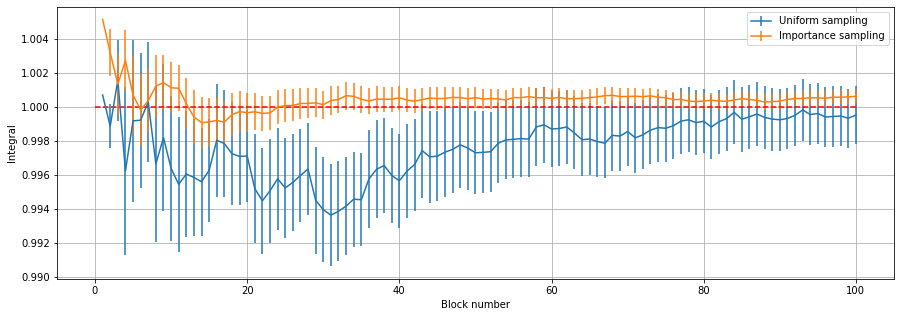

In [9]:
xu, yu, erru = np.loadtxt("2.1/data/uniform.out", usecols=(0,1,2), delimiter=' ', unpack='true')
xi, yi, erri = np.loadtxt("2.1/data/importance.out", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(15,5))

plt.errorbar(xu,yu,yerr=erru, label = 'Uniform sampling')
plt.errorbar(xi,yi,yerr=erri, label = 'Importance sampling')
plt.legend()
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Block number')
plt.ylabel('Integral')
plt.grid(True)

plt.show()

The plots shows that using the importance sampling, the variance associated with the mesure is reduced to $\sim 1/4$ respect to the uniform sampling.

### Exercise 02.2
Perform the simulation of a random walk in 3D always starting at the origin:

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length $a = 1$ along a random direction obtained by sampling uniformly the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

In the continuum, performing a uniform sampling on the solid angle means that every point over the unit sphere has a constant probability to be chosen $p(x) = \dfrac{1}{4\pi}$, but the differential area surface on the unit sphere it's not constant.

To correct the difference in $dA$, the probability density for $\theta$ it's sampled from the distribution  $p(\theta) = \dfrac{\sin(\theta)}{2}$ using the inverse transform method, while $\phi$ it's sampled from a standard uniform distribution in it's range.

I repeated the simulation 10000 times, with 100 steps per each simulation. The results are shown in the following plots.

In [10]:
from scipy.optimize import curve_fit

# define fitting function
def diffusive(x,k):  
    return k * np.sqrt(x)

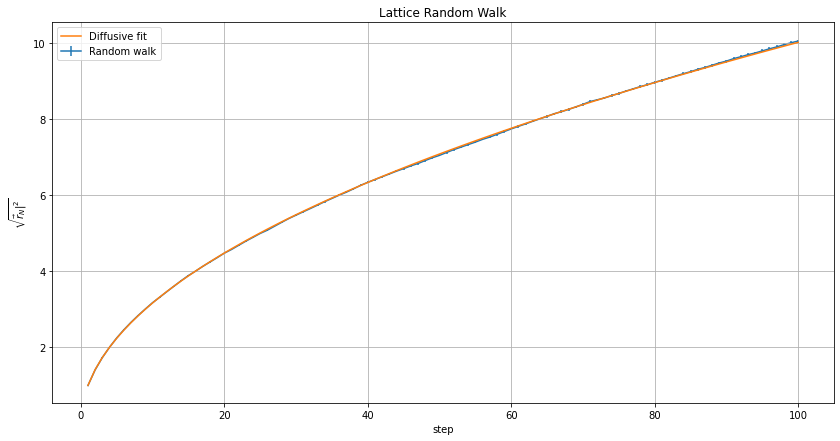

Fit parameter k = 1.00e+00 +- 2.57e-04


In [15]:
x, y, err = np.loadtxt("2.2/data/lattice.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err, label = "Random walk",zorder=1)
plt.plot(x,y_fit, label='Diffusive fit',zorder=2)
plt.title("Lattice Random Walk")
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\vec{r}_N|^2 }$')
plt.legend()
plt.grid(True)
plt.show()

print('Fit parameter k = ' +  "{:.2e}".format(p_opt[0]) + ' +- ' + "{:.2e}".format(np.sqrt(p_cov[0][0])))


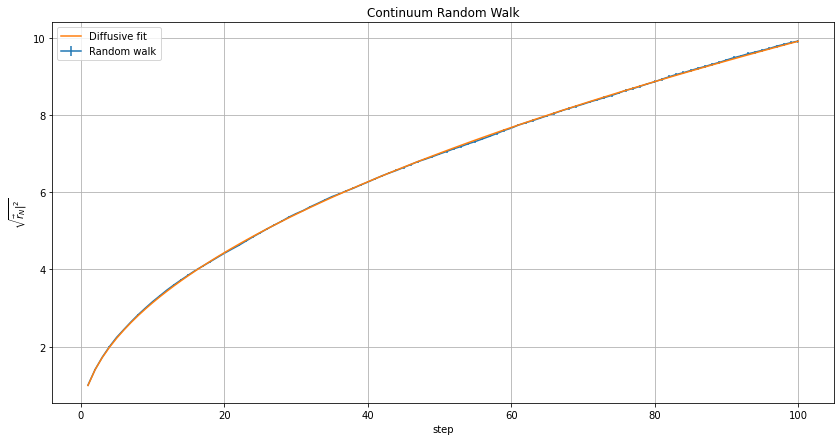

Fit parameter k = 9.91e-01 +- 2.39e-04


In [14]:
x, y, err = np.loadtxt("2.2/data/continuum.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err, label = "Random walk",zorder=1)
plt.plot(x,y_fit, label='Diffusive fit',zorder=2)
plt.title("Continuum Random Walk")
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\vec{r}_N|^2 }$')
plt.legend()
plt.grid(True)
plt.show()

print('Fit parameter k = ' +  "{:.2e}".format(p_opt[0]) + ' +- ' + "{:.2e}".format(np.sqrt(p_cov[0][0])))



Both the random walks are perfectly fitted with a diffusive fit. 